In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/penguins_size.csv')

In [8]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [9]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [15]:
x = pd.get_dummies(df.drop('species' , axis=1), drop_first=True)
y = df['species']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier(n_estimators=10,random_state=101)

In [21]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [22]:
y_pred = model.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

In [27]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

In [30]:
from sklearn.metrics import accuracy_score

In [34]:
acc_score = accuracy_score(y_test,y_pred)
acc_score

0.9900990099009901

In [36]:
error_rate = 1-accuracy_score(y_test,y_pred)
error_rate

0.00990099009900991

In [31]:
test_error = []
for n in range(1,40):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    test_error.append(1-accuracy_score(y_test,y_pred))
    

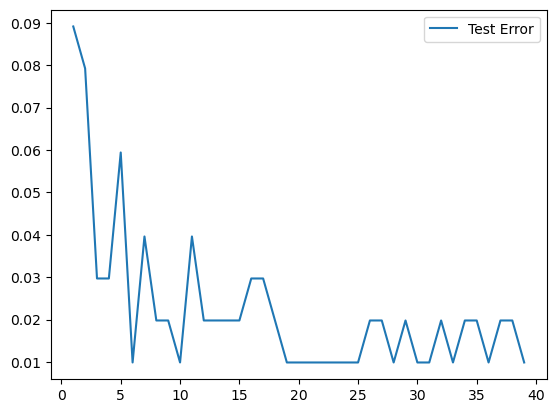

In [32]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()